In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get prediction data
Scrape team stats by previous years

https://www.sports-reference.com/cbb/seasons/2021-school-stats.html

In [2]:
def scrape_past_NCAA(url):
    year = url[url.index('season')+8:url.index('-school')].strip()
    overview = requests.get(url)
    overviewSoup = BeautifulSoup(overview.text, 'html.parser')
    
    masterList = []
    for row in str(overviewSoup).split('<tr>'):
        if 'th class=' in row:
            rowFill = []
            rowFill.append(year)
            for data in row.split('</td'):

                # get team name
                if 'data-stat="school_name"' in data:
                    if len(data) < 300:


                        temp = data[data.index('html')+6:]
                        team = temp[:temp.index("</a>")].strip()

                        # get correct &
                        if '&amp;' in team:
                            team = re.sub('&amp;', '&', team)
                            #print(team)
                            pass

                        rowFill.append(team)

                # get other data
                else:
                    newData = data[4:]
                    try:
                        val = newData[newData.index('">')+2:].strip()
                        #print(val)
                    except:
                        pass

                    if len(val) > 0:
                        try:
                            if len(rowFill) != 33:
                                
                                rowFill.append(float(val))
                        except:
                            pass
                    else:
                        if len(rowFill) == 16:
                            rowFill.append(None)
            if rowFill not in masterList:
                masterList.append(rowFill)

    return pd.DataFrame(masterList)

In [3]:
# scrape data and format table
teamStats = scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2021-school-stats.html").append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2019-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2018-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2017-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2016-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2015-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2014-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2013-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2012-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2011-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2010-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2009-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2008-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2007-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2006-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2005-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2004-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2003-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2002-school-stats.html")).reset_index(drop=True)
teamStats = teamStats.append(scrape_past_NCAA("https://www.sports-reference.com/cbb/seasons/2001-school-stats.html")).reset_index(drop=True)

# format table
teamStats.columns = ["Year","School","G","W_total","L_total","W-L%","SRS","SOS","W_conf","L_conf","W_home","L_home","W_away","L_away","PPG","Opp_PPG","MP","FG","FGA","FG%","3P","3PA","3P%","FT","FTA","FT%","ORB","TRB","AST","STL","BLK","TOV","PF"]
teamStats['W_total'] = pd.Series(teamStats['W_total'], dtype = "int32")
teamStats['L_total'] = pd.Series(teamStats['L_total'], dtype = "int32")
teamStats['W_conf'] = pd.Series(teamStats['W_conf'], dtype = "int32")
teamStats['L_conf'] = pd.Series(teamStats['L_conf'], dtype = "int32")
teamStats['W_home'] = pd.Series(teamStats['W_home'], dtype = "int32")
teamStats['L_home'] = pd.Series(teamStats['L_home'], dtype = "int32")
teamStats['W_away'] = pd.Series(teamStats['W_away'], dtype = "int32")
teamStats['L_away'] = pd.Series(teamStats['L_away'], dtype = "int32")

teamStats['W%_home'] = pd.Series(round(teamStats['W_home'] / (teamStats['W_home'] + teamStats['L_home']), 4))
teamStats['W%_away'] = pd.Series(round(teamStats['W_away'] / (teamStats['W_away'] + teamStats['L_away']), 4))
teamStats['W%_conf'] = pd.Series(round(teamStats['W_conf'] / (teamStats['W_conf'] + teamStats['L_conf']), 4))
teamStats['PPG'] = pd.Series(round(teamStats['PPG'] / teamStats['G'], 4))
teamStats['Opp_PPG'] = pd.Series(round(teamStats['Opp_PPG'] / teamStats['G'], 4))
teamStats['FG'] = pd.Series(round(teamStats['FG'] / teamStats['G'], 4))
teamStats['FGA'] = pd.Series(round(teamStats['FGA'] / teamStats['G'], 4))
teamStats['FG%'] = pd.Series(round(teamStats['FG%'] / teamStats['G'], 4))
teamStats['3P'] = pd.Series(round(teamStats['3P'] / teamStats['G'], 4))
teamStats['3PA'] = pd.Series(round(teamStats['3PA'] / teamStats['G'], 4))
teamStats['3P%'] = pd.Series(round(teamStats['3P%'] / teamStats['G'], 4))
teamStats['FT'] = pd.Series(round(teamStats['FT'] / teamStats['G'], 4))
teamStats['FTA'] = pd.Series(round(teamStats['FTA'] / teamStats['G'], 4))
teamStats['ORB'] = pd.Series(round(teamStats['ORB'] / teamStats['G'], 4))
teamStats['TRB'] = pd.Series(round(teamStats['TRB'] / teamStats['G'], 4))
teamStats['AST'] = pd.Series(round(teamStats['AST'] / teamStats['G'], 4))
teamStats['STL'] = pd.Series(round(teamStats['STL'] / teamStats['G'], 4))
teamStats['BLK'] = pd.Series(round(teamStats['BLK'] / teamStats['G'], 4))
teamStats['TOV'] = pd.Series(round(teamStats['TOV'] / teamStats['G'], 4))
teamStats['PF'] = pd.Series(round(teamStats['PF'] / teamStats['G'], 4))
teamStats['G'] = pd.Series(teamStats['G'], dtype = "int32")

In [4]:
teamStats

,Year,School,G,W_total,L_total,W-L%,SRS,SOS,W_conf,L_conf,...,ORB,TRB,AST,STL,BLK,TOV,PF,W%_home,W%_away,W%_conf
0,2021,Abilene Christian,29,24,5,0.828,6.27,-6.37,13,2,...,0.0234,11.3448,36.1034,17.6897,9.7241,2.9655,13.5862,1.0000,0.5556,0.8667
1,2021,Air Force,25,5,20,0.200,-12.98,0.22,3,17,...,0.0277,4.4000,23.2000,12.3200,7.0800,2.4800,14.4400,0.2727,0.0909,0.1500
2,2021,Akron,23,15,8,0.652,1.85,-1.96,12,6,...,0.0330,11.3913,38.9130,13.2609,4.9130,3.6522,11.7826,0.9000,0.5000,0.6667
3,2021,Alabama A&M,15,6,9,0.400,-18.86,-14.99,4,9,...,0.0418,10.6667,38.4667,10.9333,5.4667,3.6000,15.2667,0.7143,0.1250,0.3077
4,2021,UAB,29,22,7,0.759,5.80,-3.83,13,5,...,0.0240,10.7241,36.6552,10.6207,7.9655,4.1724,10.4828,0.8824,0.6000,0.7222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,2001,Wright State,29,18,11,0.621,1.39,-1.11,8,6,...,11.0000,35.6207,14.5862,6.5862,3.7586,16.5172,19.4138,0.8235,0.3333,0.5714
6822,2001,Wyoming,30,20,10,0.667,8.94,3.87,10,4,...,13.0667,40.8667,16.8333,6.4333,4.8000,14.5667,21.6667,0.8571,0.5000,0.7143
6823,2001,Xavier,29,21,8,0.724,12.15,4.60,12,4,...,13.4828,38.7931,13.7241,7.1724,3.9655,14.3103,19.0000,0.9333,0.5833,0.7500
6824,2001,Yale,27,10,17,0.370,-9.49,-5.75,7,7,...,10.3333,33.9259,14.5926,6.7778,2.9259,15.6667,20.4815,0.6000,0.2667,0.5000


# Get target data
Get every tournament result for all teams

https://apps.washingtonpost.com/sports/schools/kansas/

In [5]:
tourney2000 = pd.read_csv("NCAA_tournament_finishes.csv")

### Combine data sets

In [6]:
teamStats['Year'] = pd.Series(teamStats['Year'], dtype = "int32")
tourney2000['Year'] = pd.Series(tourney2000['Year'], dtype = "int32")
tourney2000['Seed'] = pd.Series(tourney2000['Seed'], dtype = "int32")

In [7]:
NCAA = teamStats.merge(tourney2000, how='left', on = ["School", 'Year'])
valid = []
for i in pd.Series(NCAA['Exit Round']):
    if (str(i)) != 'nan':
        valid.append(True)
    else:
        valid.append(False)
ncaa2000 = NCAA[valid].reset_index(drop=True)

### Split data into train, test, and validation set

In [13]:
# add numeric target
rounds = {'Play-In': 0,'First Round':0, 'Second Round':0.2, 'Sweet 16':0.4, 'Elite Eight':0.65, 'Final Four':0.875, 'National Championship':1}
nums = ncaa2000['Exit Round'].map(rounds)
ncaa2000['Exit Round Num'] = nums

# get validation set
validation = ncaa2000[ncaa2000['Year'] == 2019]
target = validation['Exit Round Num']
predictors = validation[['W-L%','SOS','PPG','Opp_PPG','FG','FG%','3P','3P%','FT','FT%','TRB','ORB', 'TOV',"W%_home", 'W%_away', 'Seed']]

# split rest of data into train and test
a = ncaa2000[ncaa2000['Year'] != 2019]
y = a['Exit Round Num']

# features
names = ['W-L%','SOS','PPG','Opp_PPG','FG','FG%','3P','3P%','FT','FT%','TRB','ORB', 'TOV',"W%_home", 'W%_away', 'Seed']
X = a[names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, criterion = 'mse')
rf.fit(X_train, y_train)
print('Test Score: ', rf.score(X_test, y_test))

# Evaluate
RFPredict = rf.predict(predictors)
print("Mean squared error: %.3f" % mean_squared_error(target, RFPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(target, RFPredict))
print('R2 score: %.3f' % r2_score(target, RFPredict)) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Test Score:  0.5826878851037758
Mean squared error: 0.023
Mean absolute error: 0.118
R2 score: 0.607


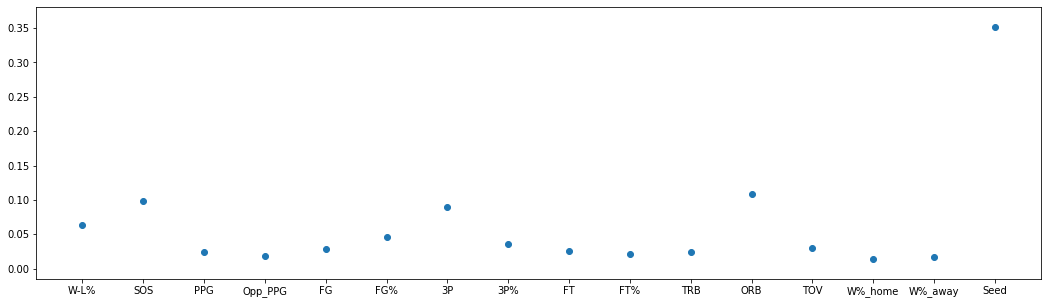

In [15]:
plt.figure(figsize=(18,5))
plt.scatter(names, rf.feature_importances_)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor(random_state=1,
                              max_depth=None)

bag = BaggingRegressor(base_estimator=tree,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

bag.fit(X_train, y_train)
print('Test Score: ', bag.score(X_test, y_test))

# Evaluate
BagPredict = bag.predict(predictors)
print("Mean squared error: %.3f" % mean_squared_error(target, BagPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(target, BagPredict))
print('R2 score: %.3f' % r2_score(target, BagPredict))

Test Score:  0.5868852473281405
Mean squared error: 0.024
Mean absolute error: 0.119
R2 score: 0.598
